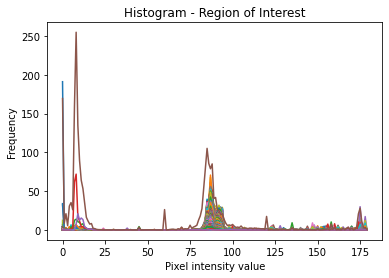

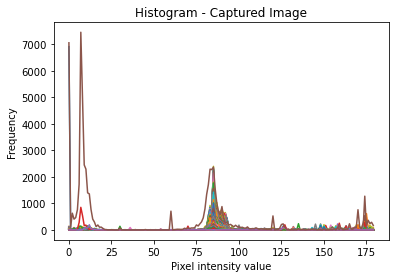

In [1]:
## Task 2: Template Matching using Histograms

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Barrel.jpg', -1)
hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hist1 = cv2.calcHist([hsvimg],[0, 1], None, [180, 256], [0, 180, 0, 256])

vid = cv2.VideoCapture('Barrel.mp4')
i = 1000

success, frame = vid.read()
vid.release()
frame1 = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
hist2 = cv2.calcHist([frame1],[0, 1], None, [180, 256], [0, 180, 0, 256])
cv2.normalize(hist1, hist1 ,0 , 255, cv2.NORM_MINMAX)
res = cv2.calcBackProject([frame1], [0, 1], hist1, [0, 180, 0, 256], 1)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(res, -1, disc, res) #res is the matrix obtained after back projection
ret, thresh = cv2.threshold(res, 50, 255, 0)
final = cv2.merge((thresh, thresh, thresh))
result = cv2.bitwise_or(frame, final)

cv2.imshow('Result', result)

result1 = np.vstack((frame, final, result))
cv2.imwrite('Result.jpg', result1)

plt.figure(),plt.plot(hist1),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Histogram - Region of Interest')
plt.figure(),plt.plot(hist2),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Histogram - Captured Image')
plt.show()

